## SENG 474 Data Mining Project

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

data = pd.read_csv('google-play-store-apps/googleplaystore.csv')
#wait like 30s for this to finish
to_drop = ['Reviews',
          'Size',
          'Genres',
          'Last Updated',
          'Current Ver',
          'Android Ver']
data.drop(to_drop, inplace=True, axis=1)
data.head()


,App,Category,Rating,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,"100,000+",Free,0,Everyone


In [133]:
# installs = r'^(\d*)'
# extr = data["Installs"].str.replace(",", '')
# extr = extr.str.extract(installs)
# extr.head()

# Fixing Price
data = data.where(data['Price'] != "Everyone")
data["Price"] = data["Price"].str.replace("$", '')
data["Price"] = pd.to_numeric(data["Price"])
# data["Price"] = extr.apply(lambda x: pd.to_numeric(x), axis=0)

# Fixing Installs
data["Installs"] = data["Installs"].str.replace(",", '')
data["Installs"] = data["Installs"].str.replace("+", '')
data["Installs"] = pd.to_numeric(data["Installs"])
# data["Installs"] = extr.apply(lambda x: pd.to_numeric(x), axis=0)


data.head()

,App,Category,Rating,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000.0,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,500000.0,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5000000.0,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000.0,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,100000.0,Free,0.0,Everyone


In [134]:
app_data = data.to_dict('index')
numeric_comparing_keys = { "Rating", "Installs", "Price"}

def sim_distance_euclidean_distance(app_data,app1,app2):
#     print ("############## Calculating ED ##############")
#     print ("Comparing \"", app_data[app1]["App"], "\" with", app_data[app2]["App"], "\"")
    sum_of_squares = 0
    
    for item in numeric_comparing_keys:
        sum_of_squares += pow(app_data[app1][item]-app_data[app2][item],2)
    
    if app_data[app1]["Category"] != app_data[app2]["Category"]:
        sum_of_squares += 1

    #   4.164931278615862e-12
    return 1/(1+sum_of_squares)


print (sim_distance_euclidean_distance(app_data, 0, 1))




4.164931278615862e-12


In [135]:
def sim_distance_pearson_score(app_data,p1,p2):
#     print ("############## Calculating Pearson Score ##############")
#     print ("Comparing \"", app_data[p1]["App"], "\" with", app_data[p2]["App"], "\"")

    si= { "Rating", "Installs", "Price"}
    
    #  How to compare category?
    # ADD N + 1 when comparing with category
    n = 3
    
    
    # Add up all the preferences
    sum1=sum([app_data[p1][it] for it in numeric_comparing_keys])
    sum2=sum([app_data[p2][it] for it in numeric_comparing_keys])
    
    # Sum up the squares
    sum1Sq=sum([pow(app_data[p1][it],2) for it in numeric_comparing_keys])
    sum2Sq=sum([pow(app_data[p2][it],2) for it in numeric_comparing_keys])
    
    # Sum up the products
    pSum=sum([app_data[p1][it]*app_data[p2][it] for it in numeric_comparing_keys])
    
    # Calculate Pearson score
    num=pSum-(sum1*sum2/n)
    den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
    if den==0: return 0
    r=num/den
    return r

# 0.9999999497436914
# 0.9999999393128385

print (sim_distance_pearson_score(app_data,0,1324))




0.9999999370780523


In [131]:
# Returns the best matches for given app from the dictionary
def topMatches(prefs,person,n=5,similarity=sim_distance_pearson_score):
    scores=[(similarity(prefs,person,other),prefs[other]["App"])
    for other in prefs if other!=person]
    
    # Sort the list so the highest scores appear at the top
    scores.sort( )
    scores.reverse( )
    return scores[0:n]

print(topMatches(app_data, 296))

[(1.0, 'VMate Lite - Funny Short Videos Social Network'), (1.0, 'SONIC Drive-In'), (1.0, 'Justice League Action Run'), (0.9999999999999963, 'HD Video Download for Facebook'), (0.9999999999999963, "Game for KIDS: KIDS match'em")]


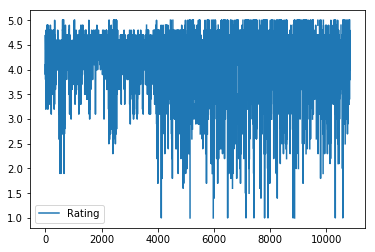

In [4]:
data.shape
data.plot(y=2)

In [5]:
def count_unique(col):
    unique, counts = np.unique(col, return_counts=True)
    return np.array(list(zip(unique, counts)), dtype=object)

X = data.values

def plot_bar(col):
    categories = count_unique(col)

    fig, ax = plt.subplots(figsize=(18,8))
    y_pos = np.arange(len(categories[:, 0]))
    plt.bar(y_pos, categories[:, 1])
    plt.xticks(y_pos, categories[:, 0])
    plt.xticks(rotation=75)
    
plot_bar(X[:, 1])
#categories

TypeError: '<' not supported between instances of 'str' and 'float'